In [1]:
import numpy as np
# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])


In [2]:
X1=np.random.randn(200,2)
X2=np.random.randn(200,2)
X3=np.random.randn(200,2)

In [3]:
# LA distribution etant normale pour affecter les centres il suffit d'ajouter les coordonnées à chaque echantillon
groupe1=X1+center_1
groupe2=X2+center_2
groupe3=X1+center_3


In [4]:
group=np.concatenate((groupe1,groupe2,groupe3),axis=0)

In [5]:
import pandas as pd
groupe=pd.DataFrame(group)

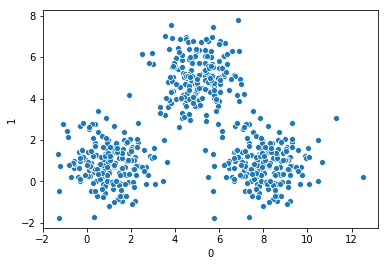

In [6]:
%matplotlib inline
import seaborn as sb
sb.scatterplot(x =0, y=1, data = groupe)

In [7]:
#nbre_de_clusters
k=3
#nbre_observation
n=groupe.shape[0]
#nbre_variables
c=groupe.shape[1]


In [8]:
#centre de gravité du dataset
array_means=np.array(groupe.mean())

In [9]:
array_means

array([4.71516158, 2.23923958])

In [10]:
array_std=np.array(groupe.std())

In [11]:
array_std

array([3.04503861, 2.2154672 ])

In [12]:
centers=array_std * np.random.randn(k,c) + array_means

In [13]:
center=pd.DataFrame(centers)

In [14]:
center

,0,1
0,6.475469,0.082032
1,3.490595,3.804456
2,3.123420,-0.518294


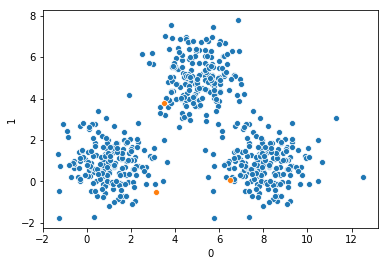

In [15]:
sb.scatterplot(x =0, y=1, data = groupe)
sb.scatterplot(x =0, y=1, data = center)

In [16]:
centers_old=np.zeros(center.shape)

In [17]:
centers_old

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [18]:
from copy import deepcopy
centers_new=deepcopy(centers)

In [19]:
clusters=np.random.randn(n)
distances=np.random.randn(n,k)

In [20]:
error=10
while error!=0:
    for i in range(k):
        distances[:,i]=np.linalg.norm(groupe-centers_new[i],axis=1)
    clusters=np.argmin(distances,axis=1)  
    centers_old = deepcopy(centers_new)
    for i in range(k):
        centers_new[i]=groupe[clusters==i].mean()
    error=np.linalg.norm(centers_old-centers_new)
   
      

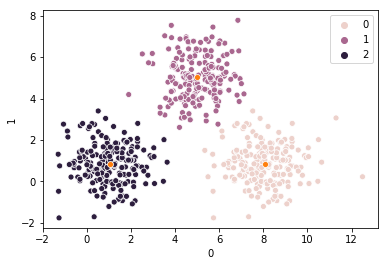

In [21]:
centers_new=pd.DataFrame(centers_new)  
sb.scatterplot(x =0, y=1, data = groupe,hue=clusters)
sb.scatterplot(x =0, y=1, data = centers_new)